<a href="https://colab.research.google.com/github/rohanguptha/INFO5731/blob/master/bompally_SelfStudy7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.text import *

In [31]:
path = untar_data(URLs.IMDB_SAMPLE)
path.ls()

[PosixPath('/root/.fastai/data/imdb_sample/texts.csv'),
 PosixPath('/root/.fastai/data/imdb_sample/data_save.pkl')]

In [32]:
df = pd.read_csv(path/'texts.csv')
df.head()

,label,text,is_valid
0,negative,Un-bleeping-believable! Meg Ryan doesn't even ...,False
1,positive,This is a extremely well-made film. The acting...,False
2,negative,Every once in a long while a movie will come a...,False
3,positive,Name just says it all. I watched this movie wi...,False
4,negative,This movie succeeds at being one of the most u...,False


In [33]:
df['text'][1]

'This is a extremely well-made film. The acting, script and camera-work are all first-rate. The music is good, too, though it is mostly early in the film, when things are still relatively cheery. There are no really superstars in the cast, though several faces will be familiar. The entire cast does an excellent job with the script.<br /><br />But it is hard to watch, because there is no good end to a situation like the one presented. It is now fashionable to blame the British for setting Hindus and Muslims against each other, and then cruelly separating them into two countries. There is some merit in this view, but it\'s also true that no one forced Hindus and Muslims in the region to mistreat each other as they did around the time of partition. It seems more likely that the British simply saw the tensions between the religions and were clever enough to exploit them to their own ends.<br /><br />The result is that there is much cruelty and inhumanity in the situation and this is very u

In [0]:
data_lm = TextDataBunch.from_csv(path, 'texts.csv')

In [0]:
data_lm.save()

In [0]:
data = load_data(path)

In [37]:
data = TextClasDataBunch.from_csv(path, 'texts.csv')
data.show_batch()

text,target
"xxbos xxmaj raising xxmaj victor xxmaj vargas : a xxmaj review \n \n xxmaj you know , xxmaj raising xxmaj victor xxmaj vargas is like sticking your hands into a big , steaming bowl of xxunk . xxmaj it 's warm and gooey , but you 're not sure if it feels right . xxmaj try as i might , no matter how warm and gooey xxmaj raising xxmaj",negative
"xxbos xxup the xxup shop xxup around xxup the xxup corner is one of the sweetest and most feel - good romantic comedies ever made . xxmaj there 's just no getting around that , and it 's hard to actually put one 's feeling for this film into words . xxmaj it 's not one of those films that tries too hard , nor does it come up with",positive
"xxbos xxmaj now that xxmaj che(2008 ) has finished its relatively short xxmaj australian cinema run ( extremely limited xxunk screen in xxmaj sydney , after xxunk ) , i can xxunk join both xxunk of "" xxmaj at xxmaj the xxmaj movies "" in taking xxmaj steven xxmaj soderbergh to task . \n \n xxmaj it 's usually satisfying to watch a film director change his style /",negative
"xxbos xxmaj this film sat on my xxmaj tivo for weeks before i watched it . i dreaded a self - indulgent xxunk flick about relationships gone bad . i was wrong ; this was an xxunk xxunk into the screwed - up xxunk of xxmaj new xxmaj yorkers . \n \n xxmaj the format is the same as xxmaj max xxmaj xxunk ' "" xxmaj la xxmaj ronde",positive
"xxbos xxmaj many neglect that this is n't just a classic due to the fact that it 's the first xxup 3d game , or even the first xxunk - up . xxmaj it 's also one of the first stealth games , one of the xxunk definitely the first ) truly claustrophobic games , and just a pretty well - rounded gaming experience in general . xxmaj with graphics",positive


In [38]:
data.vocab.itos[:10]

['xxunk',
 'xxpad',
 'xxbos',
 'xxfld',
 'xxmaj',
 'xxup',
 'xxrep',
 'xxwrep',
 'the',
 ',']

In [39]:
data.train_ds[0][0]

Text xxbos xxmaj december holiday xxunk , like the original xxmaj frosty , ought to be richly - produced with quality music and a wholesome , yet lighthearted storyline . xxmaj they should have a touch of the mystical magic of the holidays . xxmaj basically , they should look , sound , and feel ... well , " special " and they should have a decent and appropriate xxmaj december holiday subtext . 
 
  xxmaj so when i saw xxmaj legend of xxmaj frosty the xxmaj snowman in the xxup tv xxunk , i got my kids ( 6 and xxunk pumped up for it by telling them the story of the original xxmaj frosty and passionately relating how much i enjoyed it as a kid . xxmaj as my wife and kids xxunk up on the couch to watch the movie the expectations were high , but 10 minutes into it my kids were xxunk and my wife and i were giving each other " the look " and rolling our eyes . xxmaj after 35 minutes my kids were actually asking to go to bed -- i guess they were fed up with the insensitive language and pointl

In [40]:
data.train_ds[0][0].data[:10]

array([   2,    4, 6126, 2804,    0,    9,   49,    8,  206,    4])

In [0]:
data = (TextList.from_csv(path, 'texts.csv', cols='text')
                .split_from_df(col=2)
                .label_from_df(cols=0)
                .databunch())

In [0]:
bs=48

In [43]:
path = untar_data(URLs.IMDB)
path.ls()

[PosixPath('/root/.fastai/data/imdb/train'),
 PosixPath('/root/.fastai/data/imdb/data_lm.pkl'),
 PosixPath('/root/.fastai/data/imdb/README'),
 PosixPath('/root/.fastai/data/imdb/models'),
 PosixPath('/root/.fastai/data/imdb/imdb.vocab'),
 PosixPath('/root/.fastai/data/imdb/tmp_lm'),
 PosixPath('/root/.fastai/data/imdb/unsup'),
 PosixPath('/root/.fastai/data/imdb/tmp_clas'),
 PosixPath('/root/.fastai/data/imdb/test')]

In [44]:
(path/'train').ls()

[PosixPath('/root/.fastai/data/imdb/train/neg'),
 PosixPath('/root/.fastai/data/imdb/train/unsupBow.feat'),
 PosixPath('/root/.fastai/data/imdb/train/pos'),
 PosixPath('/root/.fastai/data/imdb/train/labeledBow.feat')]

In [0]:
data_lm = (TextList.from_folder(path)
           #Inputs: all the text files in path
            .filter_by_folder(include=['train', 'test', 'unsup']) 
           #We may have other temp folders that contain text files so we only keep what's in train and test
            .split_by_rand_pct(0.1)
           #We randomly split and keep 10% (10,000 reviews) for validation
            .label_for_lm()           
           #We want to do a language model so we label accordingly
            .databunch(bs=bs))
data_lm.save('data_lm.pkl')

In [0]:
data_lm = load_data(path, 'data_lm.pkl', bs=bs)

In [47]:
data_lm.show_batch()

idx,text
0,"failed . xxmaj stupid , not funny . xxmaj tedious , not hilarious . xxmaj bad , not good . xxmaj that in a nutshell is all i can say for this video . xxbos xxmaj the worst kind of film . xxmaj basically , the xxup us xxmaj declaration of xxmaj independence was replaced with a plasma screen and this fooled the museum 's security for several days ."
1,"military over - xxunk have all grown so much since the time of the first film , and "" xxmaj wargames : xxmaj the xxmaj dead xxmaj code "" had an opportunity to bring it all into a great flick . \n \n xxmaj the movie failed on pretty much every level , but i particularly blame the writers and anyone who had any input regarding the realism of"
2,"they would have roasted him in two seconds flat ! "" xxup ow "" indeed ! \n \n xxmaj do n't get me wrong . i rated this movie low . xxmaj still , it 's never boring ( except when the scientist tries to explain everything - only to make it all sound more and more ridiculous ) , and you have to admit , in your little"
3,"but on the big screen , flush that expectation down the toilet immediately along with the money you would use for a ticket .. xxmaj you may get more enjoyment that way . xxmaj the acting was terrible , the plot was completely unrealistic , ( along with the so called "" twist "" in the end . i must say this .. xxmaj the ending did surprise me ."
4,"group of stereotypical blacks upset who will appear on different xxmaj springer shows . xxmaj at the end , the movie leaves one with some xxunk and xxmaj springer rhetoric about the need for us to see the real world ( evidently as seen through his show ) . i agree with him there- it is important to know how the world really is so that we can seek to"


In [0]:
learn = language_model_learner(data_lm, AWD_LSTM, drop_mult=0.3)

In [51]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


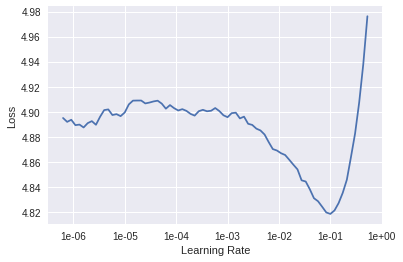

In [52]:
learn.recorder.plot(skip_end=15)

In [53]:
learn.fit_one_cycle(1, 1e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,4.202726,4.059827,0.292900,1:24:23


In [0]:
learn.save('fit_head')

In [55]:
learn.load('fit_head')

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (90000 items)
x: LMTextList
xxbos i vowed a long time ago to xxup never , xxup ever watch a movie that has xxup anyone who xxup ever was a regular cast member of " xxmaj saturday xxmaj night xxmaj live " . i did n't rent " xxmaj corky xxmaj romano " but i was forced by my unfailing good manners to watch it for half an hour . xxmaj then my good manners failed . xxmaj stupid , not funny . xxmaj tedious , not hilarious . xxmaj bad , not good . xxmaj that in a nutshell is all i can say for this video .,xxbos xxmaj the worst kind of film . xxmaj basically , the xxup us xxmaj declaration of xxmaj independence was replaced with a plasma screen and this fooled the museum 's security for several days . xxmaj eh ? 
 
  xxmaj the plasma screen that would theoretically run for less than 2 seconds off that watch battery , assuming it had a low enough internal resistance to deliver the required current , which it would n't . 
 
  xxmaj it would

LanguageLearner(data=TextLMDataBunch;

Train: LabelList (90000 items)
x: LMTextList
xxbos i vowed a long time ago to xxup never , xxup ever watch a movie that has xxup anyone who xxup ever was a regular cast member of " xxmaj saturday xxmaj night xxmaj live " . i did n't rent " xxmaj corky xxmaj romano " but i was forced by my unfailing good manners to watch it for half an hour . xxmaj then my good manners failed . xxmaj stupid , not funny . xxmaj tedious , not hilarious . xxmaj bad , not good . xxmaj that in a nutshell is all i can say for this video .,xxbos xxmaj the worst kind of film . xxmaj basically , the xxup us xxmaj declaration of xxmaj independence was replaced with a plasma screen and this fooled the museum 's security for several days . xxmaj eh ? 
 
  xxmaj the plasma screen that would theoretically run for less than 2 seconds off that watch battery , assuming it had a low enough internal resistance to deliver the required current , which it would n't . 
 
  xxmaj it would

In [0]:
learn.unfreeze()

In [57]:
learn.fit_one_cycle(1, 1e-3, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,3.877043,3.802437,0.321361,1:34:19


In [0]:
learn.save('fine_tuned')

In [0]:
learn.load('fine_tuned');

In [0]:
TEXT = "I liked this movie because"
N_WORDS = 40
N_SENTENCES = 2

In [61]:
print("\n".join(learn.predict(TEXT, N_WORDS, temperature=0.75) for _ in range(N_SENTENCES)))

I liked this movie because it made me feel really sad . i see some other reviewer who actually had to see it . It is quite possibly a bit of a guy getting his kicks . 
 
  You ca n't help but
I liked this movie because it was actually a great movie , and really i sought to see it again and again . This movie was a lot like Sonic Adventures , or Children of the West . i was
I liked this movie because it made me feel really sad . i see some other reviewer who actually had to see it . It is quite possibly a bit of a guy getting his kicks . 
 
  You ca n't help but
I liked this movie because it was actually a great movie , and really i sought to see it again and again . This movie was a lot like Sonic Adventures , or Children of the West . i was


In [0]:
learn.save_encoder('fine_tuned_enc')

In [0]:
path = untar_data(URLs.IMDB)

In [0]:
data_clas = (TextList.from_folder(path, vocab=data_lm.vocab)
             #grab all the text files in path
             .split_by_folder(valid='test')
             #split by train and valid folder (that only keeps 'train' and 'test' so no need to filter)
             .label_from_folder(classes=['neg', 'pos'])
             #label them all with their folders
             .databunch(bs=bs))

data_clas.save('data_clas.pkl')

In [0]:
data_clas = load_data(path, 'data_clas.pkl', bs=bs)

In [66]:
data_clas.show_batch()

text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj by now you 've probably heard a bit about the new xxmaj disney dub of xxmaj miyazaki 's classic film , xxmaj laputa : xxmaj castle xxmaj in xxmaj the xxmaj sky . xxmaj during late summer of 1998 , xxmaj disney released "" xxmaj kiki 's xxmaj delivery xxmaj service "" on video which included a preview of the xxmaj laputa dub saying it was due out",pos
"xxbos xxmaj some have praised _ xxunk _ as a xxmaj disney adventure for adults . i do n't think so -- at least not for thinking adults . \n \n xxmaj this script suggests a beginning as a live - action movie , that struck someone as the type of crap you can not sell to adults anymore . xxmaj the "" crack staff "" of many older",neg
"xxbos xxunk ) is the developing world 's answer to xxmaj silence of the xxmaj lambs . xxmaj where ` xxmaj silence ' terrorized our peace of mind , ` xxmaj citizen ' exhausts and saddens us instead . xxmaj this dramatization of the xxmaj chikatilo case translates rather well , thanks to a xxmaj westernized friendship between two xxmaj rostov cops who become equals . \n \n citizenx",pos
"xxbos xxmaj the freedom of having your own xxmaj sea xxmaj going xxmaj power xxmaj boat , the excitement of going on underwater adventures a rugged , an 's man of an adventurer and xxunk so well endowed ! ) assistants in fine xxmaj bikinis were all definite selling points for "" xxup sea xxup xxunk - 61 ) . \n \n xxmaj just what was the reason for",pos


text,target
xxbos xxmaj match 1 : xxmaj tag xxmaj team xxmaj table xxmaj match xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley vs xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit xxmaj bubba xxmaj ray and xxmaj spike xxmaj dudley started things off with a xxmaj tag xxmaj team xxmaj table xxmaj match against xxmaj eddie xxmaj guerrero and xxmaj chris xxmaj benoit . xxmaj according to the rules,pos
"xxbos xxmaj by now you 've probably heard a bit about the new xxmaj disney dub of xxmaj miyazaki 's classic film , xxmaj laputa : xxmaj castle xxmaj in xxmaj the xxmaj sky . xxmaj during late summer of 1998 , xxmaj disney released "" xxmaj kiki 's xxmaj delivery xxmaj service "" on video which included a preview of the xxmaj laputa dub saying it was due out",pos
"xxbos xxmaj some have praised _ xxunk _ as a xxmaj disney adventure for adults . i do n't think so -- at least not for thinking adults . \n \n xxmaj this script suggests a beginning as a live - action movie , that struck someone as the type of crap you can not sell to adults anymore . xxmaj the "" crack staff "" of many older",neg
"xxbos xxunk ) is the developing world 's answer to xxmaj silence of the xxmaj lambs . xxmaj where ` xxmaj silence ' terrorized our peace of mind , ` xxmaj citizen ' exhausts and saddens us instead . xxmaj this dramatization of the xxmaj chikatilo case translates rather well , thanks to a xxmaj westernized friendship between two xxmaj rostov cops who become equals . \n \n citizenx",pos
"xxbos xxmaj the freedom of having your own xxmaj sea xxmaj going xxmaj power xxmaj boat , the excitement of going on underwater adventures a rugged , an 's man of an adventurer and xxunk so well endowed ! ) assistants in fine xxmaj bikinis were all definite selling points for "" xxup sea xxup xxunk - 61 ) . \n \n xxmaj just what was the reason for",pos


In [0]:
learn = text_classifier_learner(data_clas, AWD_LSTM, drop_mult=0.5)
learn.load_encoder('fine_tuned_enc')

In [68]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.
LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


In [0]:
learn.recorder.plot()

In [70]:
learn.fit_one_cycle(1, 2e-2, moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.352636,0.248236,0.899800,11:41


In [0]:
learn.save('first')

In [72]:
learn.load('first')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos i vowed a long time ago to xxup never , xxup ever watch a movie that has xxup anyone who xxup ever was a regular cast member of " xxmaj saturday xxmaj night xxmaj live " . i did n't rent " xxmaj corky xxmaj romano " but i was forced by my unfailing good manners to watch it for half an hour . xxmaj then my good manners failed . xxmaj stupid , not funny . xxmaj tedious , not hilarious . xxmaj bad , not good . xxmaj that in a nutshell is all i can say for this video .,xxbos xxmaj the worst kind of film . xxmaj basically , the xxup us xxmaj declaration of xxmaj independence was replaced with a plasma screen and this fooled the museum 's security for several days . xxmaj eh ? 
 
  xxmaj the plasma screen that would theoretically run for less than 2 seconds off that watch battery , assuming it had a low enough internal resistance to deliver the required current , which it would n't . 
 
  xxmaj it would be p

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos i vowed a long time ago to xxup never , xxup ever watch a movie that has xxup anyone who xxup ever was a regular cast member of " xxmaj saturday xxmaj night xxmaj live " . i did n't rent " xxmaj corky xxmaj romano " but i was forced by my unfailing good manners to watch it for half an hour . xxmaj then my good manners failed . xxmaj stupid , not funny . xxmaj tedious , not hilarious . xxmaj bad , not good . xxmaj that in a nutshell is all i can say for this video .,xxbos xxmaj the worst kind of film . xxmaj basically , the xxup us xxmaj declaration of xxmaj independence was replaced with a plasma screen and this fooled the museum 's security for several days . xxmaj eh ? 
 
  xxmaj the plasma screen that would theoretically run for less than 2 seconds off that watch battery , assuming it had a low enough internal resistance to deliver the required current , which it would n't . 
 
  xxmaj it would be p

In [0]:
learn.freeze_to(-2)
learn.fit_one_cycle(1, slice(1e-2/(2.6**4),1e-2), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.292317,0.205541,0.918240,12:48


In [0]:
learn.save('second')

In [0]:
learn.load('second')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos i vowed a long time ago to xxup never , xxup ever watch a movie that has xxup anyone who xxup ever was a regular cast member of " xxmaj saturday xxmaj night xxmaj live " . i did n't rent " xxmaj corky xxmaj romano " but i was forced by my unfailing good manners to watch it for half an hour . xxmaj then my good manners failed . xxmaj stupid , not funny . xxmaj tedious , not hilarious . xxmaj bad , not good . xxmaj that in a nutshell is all i can say for this video .,xxbos xxmaj the worst kind of film . xxmaj basically , the xxup us xxmaj declaration of xxmaj independence was replaced with a plasma screen and this fooled the museum 's security for several days . xxmaj eh ? 
 
  xxmaj the plasma screen that would theoretically run for less than 2 seconds off that watch battery , assuming it had a low enough internal resistance to deliver the required current , which it would n't . 
 
  xxmaj it would be p

In [0]:
learn.freeze_to(-3)
learn.fit_one_cycle(1, slice(5e-3/(2.6**4),5e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.246231,0.176457,0.931880,18:15


In [0]:
learn.save('third')

In [0]:
learn.load('third')

RNNLearner(data=TextClasDataBunch;

Train: LabelList (25000 items)
x: TextList
xxbos i vowed a long time ago to xxup never , xxup ever watch a movie that has xxup anyone who xxup ever was a regular cast member of " xxmaj saturday xxmaj night xxmaj live " . i did n't rent " xxmaj corky xxmaj romano " but i was forced by my unfailing good manners to watch it for half an hour . xxmaj then my good manners failed . xxmaj stupid , not funny . xxmaj tedious , not hilarious . xxmaj bad , not good . xxmaj that in a nutshell is all i can say for this video .,xxbos xxmaj the worst kind of film . xxmaj basically , the xxup us xxmaj declaration of xxmaj independence was replaced with a plasma screen and this fooled the museum 's security for several days . xxmaj eh ? 
 
  xxmaj the plasma screen that would theoretically run for less than 2 seconds off that watch battery , assuming it had a low enough internal resistance to deliver the required current , which it would n't . 
 
  xxmaj it would be p

In [0]:
learn.unfreeze()
learn.fit_one_cycle(1, slice(1e-3/(2.6**4),1e-3), moms=(0.8,0.7))

epoch,train_loss,valid_loss,accuracy,time
0,0.213888,0.168152,0.936520,24:37


In [0]:
learn.predict("I really loved that movie, it was awesome!")

(Category pos, tensor(1), tensor([1.2576e-05, 9.9999e-01]))